In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

import os

Using TensorFlow backend.


In [ ]:
batch_size = 16
num_classes = 10
epochs = 25

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

네트워크를 직접 설계해 보세요!

In [ ]:
# for example,
n_kernels = 32
model = Sequential()

model.add()



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)      

In [ ]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
trained_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 50s 997us/step - loss: 1.2427 - acc: 0.5658 - val_loss: 1.0509 - val_acc: 0.6313
Epoch 2/25
50000/50000 [==============================] - 48s 969us/step - loss: 0.9980 - acc: 0.6545 - val_loss: 0.9781 - val_acc: 0.6643
Epoch 3/25
50000/50000 [==============================] - 49s 981us/step - loss: 0.8629 - acc: 0.7038 - val_loss: 0.8516 - val_acc: 0.7071
Epoch 4/25
50000/50000 [==============================] - 48s 954us/step - loss: 0.7718 - acc: 0.7360 - val_loss: 0.7896 - val_acc: 0.7259
Epoch 5/25
50000/50000 [==============================] - 48s 961us/step - loss: 0.6903 - acc: 0.7652 - val_loss: 0.7991 - val_acc: 0.7288
Epoch 6/25
50000/50000 [==============================] - 48s 960us/step - loss: 0.6264 - acc: 0.7890 - val_loss: 0.7613 - val_acc: 0.7416
Epoch 7/25
50000/50000 [==============================] - 47s 941us/step - loss: 0.5684 - acc: 0.8096 - val_loss: 0.

In [ ]:
epochs_range = range(25)
validation_accuracy = trained_model.history['val_acc']
training_accuracy = trained_model.history['acc']

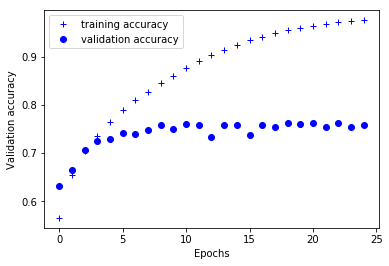

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 206us/step
Test loss: 0.9792179574489593
Test accuracy: 0.7587
